### Step 1 Load data into data frame

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox


file = tk.Tk()
file.withdraw()

file_path = filedialog.askopenfilename(
    title="Select a CSV file to load",
    filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
)

# Load the CSV file into a new DataFrame
combined_df_2022 = pd.read_csv(file_path)
file.destroy()
print('Finished loading dataframe')

Finished loading dataframe


In [5]:
### Step 2 Pick week before Holiday

In [3]:
# Define the date range
start_date = '01-01-2022'
end_date = '12-31-2022'

# Filter the DataFrame for the date range
filtered_df_holiday = combined_df_2022[(combined_df_2022['date'] >= start_date) & (combined_df_2022['date'] <= end_date)]

# Print the shape of the filtered DataFrame
print(filtered_df_holiday.shape)


(299487, 8)


### Step 3 Sort the data by dates

In [5]:
sorted_df_2022 = filtered_df_holiday.sort_values(by='date', ascending=False)


### Step 4 Check the rating distribution

<Axes: title={'center': 'Rating reviews week of Chrismas 2022'}>

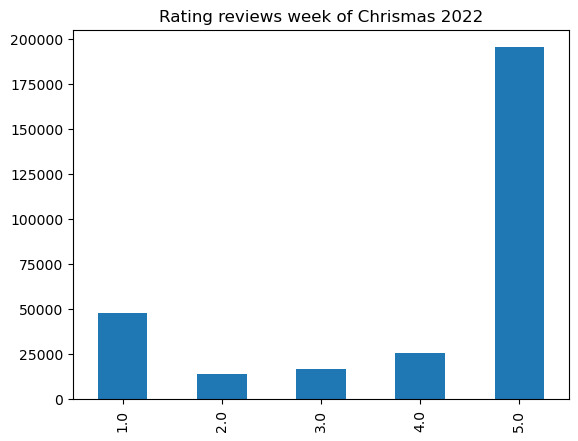

In [7]:
#Score Column evaluation
sorted_df_2022['rating'].value_counts().sort_index().plot(kind='bar', title='Rating reviews week of Chrismas 2022')

### Step 5 Load nltk dependencies

In [9]:
#Load Dependencies
import nltk
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 6 Vader Sentiment Analyis

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyizer_object = SentimentIntensityAnalyzer()

### Step 7 For loop to run sentiment analysis and save in a new res dictiona

In [13]:
sorted_df_2022

,rating,text,asin,timestamp,parent_asin,title,main_category,date
19729,5.0,Perfect for my cooler when we are camper. I'm ...,B0B9J6P1PQ,2022-12-31 20:03:13.772,B0B9J4TVR8,"Cq acrylic 4 PACK Egg Holder for Refrigerator,...",Appliances,12-31-2022
24006,5.0,"I live with other roommates, and we are all su...",B078MMXJPC,2022-12-31 08:16:55.357,B081K4Q6KQ,Cimkiz Dishwasher Magnet Clean Dirty Sign Shut...,Amazon Home,12-31-2022
244258,3.0,Not initially impressed with the quality or st...,B0BCFGDKZQ,2022-12-31 06:22:25.629,B0BCFGDKZQ,Raweao Large Capacity Egg Holder For Refrigera...,Tools & Home Improvement,12-31-2022
132546,4.0,I can't tell what is. Not a good picture of it.,B07C1CCD2S,2022-12-31 20:11:02.525,B07C1C5Y5P,Lifetime Appliance Parts Upgraded Single Door ...,Tools & Home Improvement,12-31-2022
253856,5.0,So far so good. Can be extremely difficult to ...,B07DMMB9R7,2022-12-31 19:21:40.948,B07DMMB9R7,#3 LG & Kenmore Washer NACHI Best Premium Bear...,Industrial & Scientific,12-31-2022
...,...,...,...,...,...,...,...,...
17257,5.0,Fácil de limpiar y muy resistente,B09G76121T,2022-01-01 16:03:15.930,B09G76121T,Skywin Stovetop Cover - Spill Guard Gas Range ...,Tools & Home Improvement,01-01-2022
75057,5.0,Just what my dryer needed to keep on running!,B0826N5X4Y,2022-01-01 03:31:21.698,B0826N5X4Y,Upgraded Dryer Repair Kit dryer roller kit for...,Industrial & Scientific,01-01-2022
216468,5.0,Worked flawlessly on my Kenmore fridge - insta...,B088LR8M5S,2022-01-01 20:15:24.885,B088LR8M5S,ForeverPRO 4317943 Whirlpool Icemaker Kit for ...,Tools & Home Improvement,01-01-2022
74922,5.0,The filters were so easy to install and a grea...,B01CA411SI,2022-01-01 13:41:38.438,B01CA410KW,Waterdrop 5231JA2002A Refrigerator Water Filte...,Tools & Home Improvement,01-01-2022


### Step 8 For loop to run sentiment analysis and save in a new res dictionary

In [15]:
### Run the polarity score on the entire dataset

sorted_df_2022['text'] = sorted_df_2022['text'].astype(str)

res = {}
for i, row in tqdm(sorted_df_2022.iterrows(), total=len(sorted_df_2022)):
    text = row['text']
    #print(text)
    res[i] = sentiment_analyizer_object.polarity_scores(text)

  0%|          | 0/299487 [00:00<?, ?it/s]

### Step 9 Save dictionary into a dataframe and print it out

In [17]:
vaders_christmas_2022 = pd.DataFrame(res).T
vaders_christmas_2022

,neg,neu,pos,compound
19729,0.252,0.571,0.176,-0.1531
24006,0.000,0.638,0.362,0.9593
244258,0.073,0.852,0.075,0.2686
132546,0.231,0.769,0.000,-0.3412
253856,0.053,0.864,0.083,0.2837
...,...,...,...,...
17257,0.000,1.000,0.000,0.0000
75057,0.000,1.000,0.000,0.0000
216468,0.000,0.723,0.277,0.6114
74922,0.000,0.505,0.495,0.8334


### Step 10 Merge the vader dataset with Neg/Neu/Pos compound fields with the original 2022 sorted data set

In [19]:
vaders_christmas_2022 = pd.DataFrame(res).T
merged_christmas_2022 = pd.merge(vaders_christmas_2022, sorted_df_2022, left_index=True, right_index=True)

In [21]:
merged_christmas_2022

,neg,neu,pos,compound,rating,text,asin,timestamp,parent_asin,title,main_category,date
19729,0.252,0.571,0.176,-0.1531,5.0,Perfect for my cooler when we are camper. I'm ...,B0B9J6P1PQ,2022-12-31 20:03:13.772,B0B9J4TVR8,"Cq acrylic 4 PACK Egg Holder for Refrigerator,...",Appliances,12-31-2022
24006,0.000,0.638,0.362,0.9593,5.0,"I live with other roommates, and we are all su...",B078MMXJPC,2022-12-31 08:16:55.357,B081K4Q6KQ,Cimkiz Dishwasher Magnet Clean Dirty Sign Shut...,Amazon Home,12-31-2022
244258,0.073,0.852,0.075,0.2686,3.0,Not initially impressed with the quality or st...,B0BCFGDKZQ,2022-12-31 06:22:25.629,B0BCFGDKZQ,Raweao Large Capacity Egg Holder For Refrigera...,Tools & Home Improvement,12-31-2022
132546,0.231,0.769,0.000,-0.3412,4.0,I can't tell what is. Not a good picture of it.,B07C1CCD2S,2022-12-31 20:11:02.525,B07C1C5Y5P,Lifetime Appliance Parts Upgraded Single Door ...,Tools & Home Improvement,12-31-2022
253856,0.053,0.864,0.083,0.2837,5.0,So far so good. Can be extremely difficult to ...,B07DMMB9R7,2022-12-31 19:21:40.948,B07DMMB9R7,#3 LG & Kenmore Washer NACHI Best Premium Bear...,Industrial & Scientific,12-31-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
17257,0.000,1.000,0.000,0.0000,5.0,Fácil de limpiar y muy resistente,B09G76121T,2022-01-01 16:03:15.930,B09G76121T,Skywin Stovetop Cover - Spill Guard Gas Range ...,Tools & Home Improvement,01-01-2022
75057,0.000,1.000,0.000,0.0000,5.0,Just what my dryer needed to keep on running!,B0826N5X4Y,2022-01-01 03:31:21.698,B0826N5X4Y,Upgraded Dryer Repair Kit dryer roller kit for...,Industrial & Scientific,01-01-2022
216468,0.000,0.723,0.277,0.6114,5.0,Worked flawlessly on my Kenmore fridge - insta...,B088LR8M5S,2022-01-01 20:15:24.885,B088LR8M5S,ForeverPRO 4317943 Whirlpool Icemaker Kit for ...,Tools & Home Improvement,01-01-2022
74922,0.000,0.505,0.495,0.8334,5.0,The filters were so easy to install and a grea...,B01CA411SI,2022-01-01 13:41:38.438,B01CA410KW,Waterdrop 5231JA2002A Refrigerator Water Filte...,Tools & Home Improvement,01-01-2022


### Step 11 Plot vader compound score vs the rating

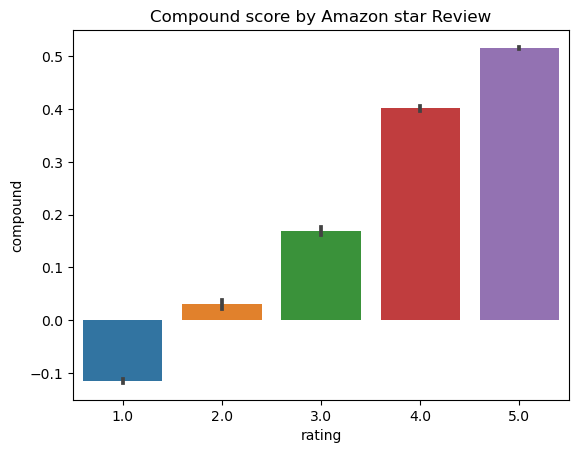

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=merged_christmas_2022, x='rating', y='compound')
ax.set_title('Compound score by Amazon star Review')
plt.show()

In [38]:
### Step 12 Compare vader score with positive neutral or negative scores


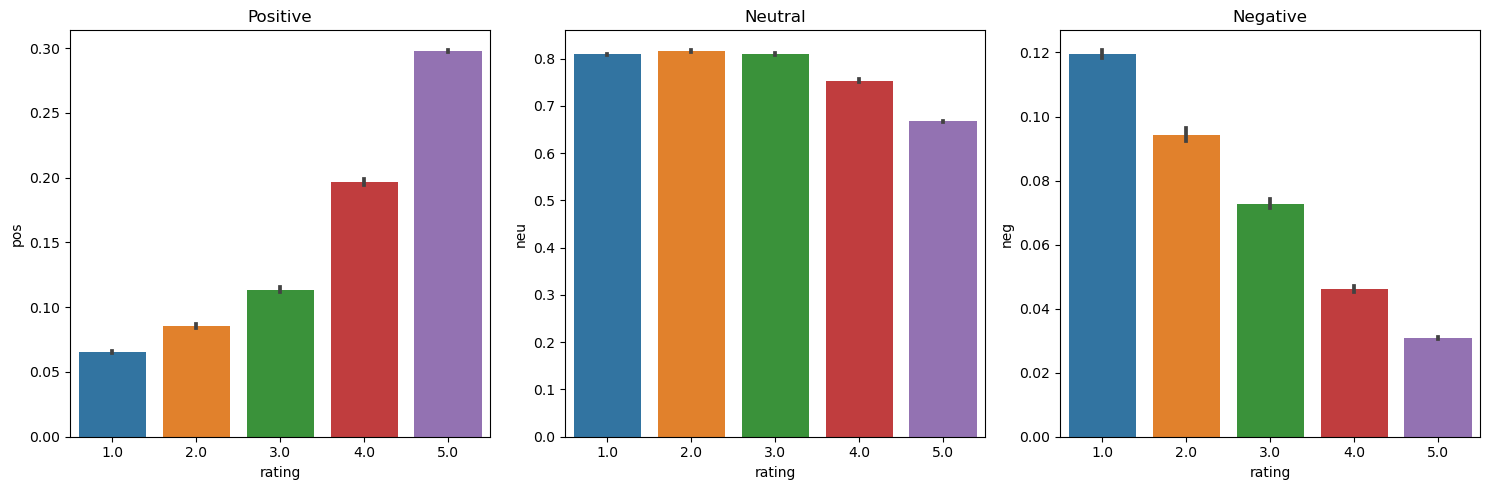

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



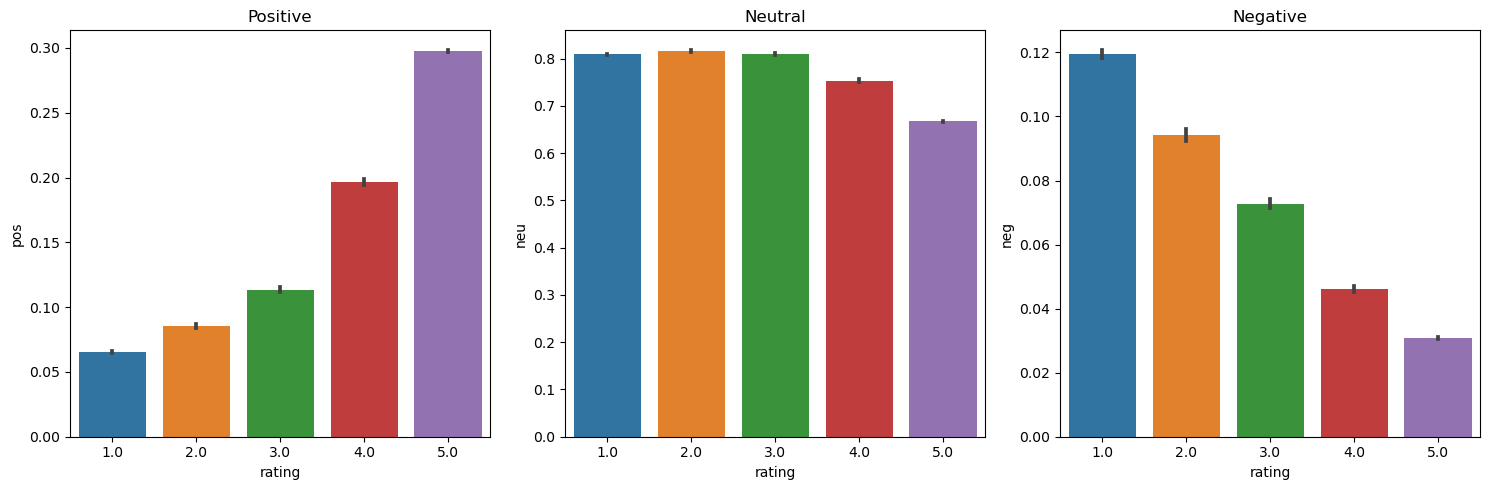

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=merged_christmas_2022, x='rating', y='pos', ax =axs[0])
sns.barplot(data=merged_christmas_2022, x='rating', y='neu', ax =axs[1])
sns.barplot(data=merged_christmas_2022, x='rating', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

